In [1]:
import pandas as pd
import sklearn.linear_model as lm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
# Membaca Data
df = pd.read_csv('harga_tanah_rembang.csv')
print(df)

     daerah  tahun  harga_permeter
0   Rembang   2007            51.3
1   Rembang   2008            55.7
2   Rembang   2009            57.8
3   Rembang   2010            59.8
4   Rembang   2011            63.1
5   Rembang   2012            66.5
6   Rembang   2013            68.9
7   Rembang   2014            74.6
8   Rembang   2015            77.5
9   Rembang   2016            79.1
10  Rembang   2017            83.4
11  Rembang   2018            85.9
12  Rembang   2019            95.2
13  Rembang   2020           102.7
14  Rembang   2021           115.4
15  Rembang   2022           127.8


In [5]:
# memanggil Fungsi
lr = lm.LinearRegression()

x = df.tahun.values.reshape(-1,1)
y = df.harga_permeter.values.reshape(-1,1)

lr.fit(x,y)

LinearRegression()

In [6]:
# Output
print("[INFO]")
print('Intercept : ', lr.intercept_)
print('Coefisien : ', lr.coef_)
print("\n[PERSAMAAN]")
print('jadi persaman yg terbentuk adalah : Y = ', lr.intercept_ , ' + ', lr.coef_, 'X')
print("\n[PREDIKSI]")
print('prediksi untuk Harga tanah tahun(X) = 2025  maka nilai Harga tanah(Y) = ', lr.predict([[2025]]))

print("\n[MANUAL]")

[INFO]
Intercept :  [-8849.0425]
Coefisien :  [[4.43191176]]

[PERSAMAAN]
jadi persaman yg terbentuk adalah : Y =  [-8849.0425]  +  [[4.43191176]] X

[PREDIKSI]
prediksi untuk Harga tanah tahun(X) = 2025  maka nilai Harga tanah(Y) =  [[125.57882353]]

[MANUAL]


In [7]:
# Evaluasi predict
df['prediksi_harga_permeter'] = lr.predict(x)

In [8]:
# Evaluasi Manual
df['SST']= np.square(df['harga_permeter'] - df['harga_permeter'].mean())
df['SSR']= np.square(df['prediksi_harga_permeter'] - df['harga_permeter'].mean())
print('SSR=', df['SSR'].sum())
print('SST=', df['SST'].sum())
print('perhitungan scr manual R-square = ', df['SSR'].sum() / df['SST'].sum())

SSR= 6678.226242647038
SST= 7258.419375
perhitungan scr manual R-square =  0.9200661876397901


In [9]:
# Evaluasi Built in Function
print('R-Squared dengan fungsi : ', r2_score(df.harga_permeter, df.prediksi_harga_permeter))
print('Mean Absolute Error : ', mean_absolute_error(df.harga_permeter, df.prediksi_harga_permeter))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(df.harga_permeter, df.prediksi_harga_permeter)))

R-Squared dengan fungsi :  0.9200661876397965
Mean Absolute Error :  4.732077205882227
Root Mean Squared Error :  6.021799629019319


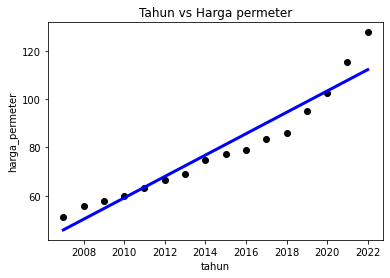

In [10]:
# Grafik
plt.scatter(x, y, color = 'black')
plt.plot(x, lr.predict(x), color = 'blue', linewidth = 3)
plt.title('Tahun vs Harga permeter')
plt.ylabel('harga_permeter')
plt.xlabel('tahun')
plt.show()

In [ ]:
import pickle
pickle.dump(lr,open('model.pkl','wb'))